In [3]:
"""  
Neuron

Linear weight combiner + activation function
BCE loss => -y lnp - (1-y) ln(1-p)
"""

'  \nNeuron\n\nLinear weight combiner + activation function\nBCE loss => -y lnp - (1-y) ln(1-p)\n'

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb 

In [5]:
X1=[(0,0),(0,1),(1,0),(1,1)]
Y1=[0,0,0,1]

X1=np.array(X1)
Y1=np.array(Y1)

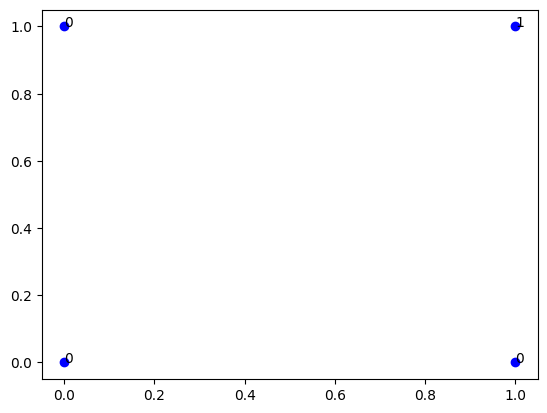

In [6]:
x=[i[0] for i in X1]
y=[i[1] for i in X1]

fig, ax=plt.subplots()
ax.scatter(x,y, color='blue')

for index, text in enumerate(Y1):
    ax.annotate(text,(x[index],y[index]))

plt.show()

In [7]:
class Neuron:
    def __init__(self, activation_fn="Sigmoid", iters=50, learning_rate=0.05):
        self.bias=None
        self.weights=None 
        self.activation_fn=activation_fn
        self.lr=learning_rate
        self.iterations=iters
        self.losses=[]

    def init_weights(self,X): #weight initialization
        req_shape=X.shape[1]
        self.bias=np.random.random_sample()
        self.weights=np.random.random_sample(req_shape)

    def sigmoid(self,x):
        return np.clip(1/(1+np.exp(-x)), -500,500)
    
    def forward(self,X): #forward one data point 
        return self.sigmoid(np.dot(X,self.weights)+self.bias)
    
    def final_pred(self,x): #final prediction
        sigm_x=self.forward(x)
        if(sigm_x>=0.5):
            return 1
        return 0
    
    def compute_loss(self,true,predicted_proba):
        return -((true)*(np.log(predicted_proba))+(1-true)*(np.log(1-predicted_proba)))
    
    def total_loss(self,X,Y): #total dataset
        loss=0
        for ind,sample in enumerate(X):
            pred=self.forward(sample)
            loss+=self.compute_loss(Y[ind],pred)
        return loss
    
    def fit(self,X,Y):
        X=np.array(X)
        Y=np.array(Y)
        self.init_weights(X)
        # print(self.weights,self.bias) 

        for epoch in range(1,self.iterations):
            gradients=np.zeros(self.weights.shape)
            bias_grad=0
            # print(gradients)
            residual=0
            for ind,x in enumerate(X):
                yi_pred=self.forward(x)
                residual+=Y[ind]-yi_pred
                gradients+=residual*x
                bias_grad+=residual

            self.weights=self.weights+self.lr*gradients
            self.bias=self.bias+self.lr*bias_grad

            print(f"Iteration: {epoch+1}, Loss: {self.total_loss(X,Y)}")
            self.losses.append(self.total_loss(X,Y))
    
        print("Training complete")

    def plot_loss_curve(self):
        x=[i+1 for i in range(len(self.losses))]
        plt.plot(x,self.losses,color='orange')
        plt.xlabel("Loss")
        plt.ylabel("Iteration")
        plt.title("Loss vs iteration curve")
        plt.show()


    def training_accuracy(self,x_train,y_train):
        correct=0
        for ind,sample in enumerate(x_train):
            if(self.final_pred(sample)==y_train[ind]):
                correct+=1

        return correct/len(x_train)

    def model_coeff__(self):
        return [self.weights, self.bias]
        

In [8]:
neuron=Neuron(iters=500,learning_rate=0.5)
neuron.fit(X1,Y1)

Iteration: 2, Loss: 4.635005059779965
Iteration: 3, Loss: 3.782293961922314
Iteration: 4, Loss: 3.2041054109163496
Iteration: 5, Loss: 2.8568051295316876
Iteration: 6, Loss: 2.6450003159109956
Iteration: 7, Loss: 2.493808334845389
Iteration: 8, Loss: 2.3691039665148086
Iteration: 9, Loss: 2.25918414399143
Iteration: 10, Loss: 2.160073530709349
Iteration: 11, Loss: 2.069989111381279
Iteration: 12, Loss: 1.9877678186665197
Iteration: 13, Loss: 1.9124733480412646
Iteration: 14, Loss: 1.8433006550015731
Iteration: 15, Loss: 1.7795479564075305
Iteration: 16, Loss: 1.7206028143087067
Iteration: 17, Loss: 1.6659312453040276
Iteration: 18, Loss: 1.6150679392053586
Iteration: 19, Loss: 1.5676073873206864
Iteration: 20, Loss: 1.5231959443745524
Iteration: 21, Loss: 1.481524821905586
Iteration: 22, Loss: 1.4423239676351998
Iteration: 23, Loss: 1.4053567582177697
Iteration: 24, Loss: 1.3704154207614017
Iteration: 25, Loss: 1.337317096424104
Iteration: 26, Loss: 1.3059004631152653
Iteration: 27, Lo

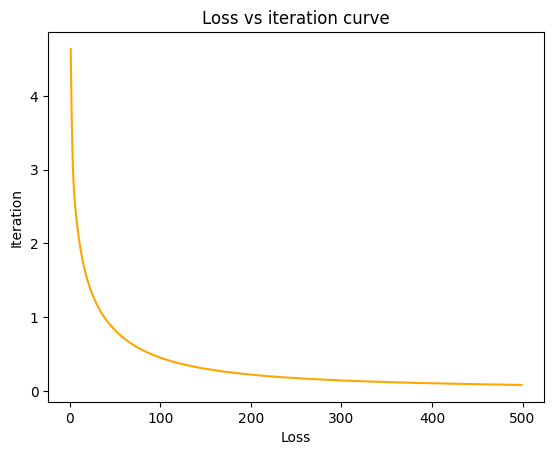

In [9]:
neuron.plot_loss_curve()

In [10]:
print(neuron.training_accuracy(X1,Y1))

1.0


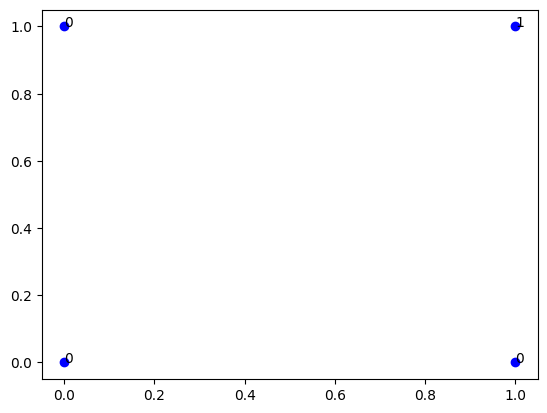

In [11]:
x=[i[0] for i in X1]
y=[i[1] for i in X1]

fig, ax=plt.subplots()
ax.scatter(x,y, color='blue')

for index, text in enumerate(Y1):
    ax.annotate(text,(x[index],y[index]))

plt.show()

In [12]:
print(neuron.weights)
print(neuron.bias)

[6.56869271 9.64177161]
-13.39734388847006


In [13]:
print(neuron.total_loss(X1,Y1))

0.08248636833587147


In [14]:
i=0
xs=[]
ys=[]
while(i<3):
    xs.append(i)
    i+=0.25

xs=np.array(xs)
ys=(-(neuron.bias)-neuron.weights[0]*xs)/neuron.weights[1]

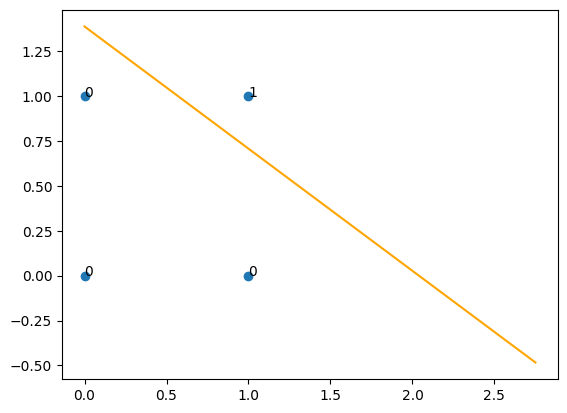

In [15]:
plt.plot(xs,ys,color="orange")
plt.scatter(x,y)
for index, text in enumerate(Y1):
    plt.annotate(text,(x[index],y[index]))

plt.show()

In [16]:
X2=np.array([[0,0],[0,1],[1,0],[1,1]])
Y2=np.array([0,1,1,0])


In [103]:
neuron2=Neuron(iters=250, learning_rate=0.005)
neuron2.fit(X2,Y2)

Iteration: 2, Loss: 3.200112864474498
Iteration: 3, Loss: 3.1889745575990576
Iteration: 4, Loss: 3.1781450812764893
Iteration: 5, Loss: 3.1676171541635574
Iteration: 6, Loss: 3.1573835862503836
Iteration: 7, Loss: 3.147437282598651
Iteration: 8, Loss: 3.137771246753181
Iteration: 9, Loss: 3.1283785838351648
Iteration: 10, Loss: 3.1192525033259653
Iteration: 11, Loss: 3.1103863215509375
Iteration: 12, Loss: 3.1017734638731858
Iteration: 13, Loss: 3.0934074666075864
Iteration: 14, Loss: 3.085281978665688
Iteration: 15, Loss: 3.0773907629423576
Iteration: 16, Loss: 3.0697276974552365
Iteration: 17, Loss: 3.0622867762481416
Iteration: 18, Loss: 3.0550621100696596
Iteration: 19, Loss: 3.0480479268381417
Iteration: 20, Loss: 3.0412385719042883
Iteration: 21, Loss: 3.0346285081224185
Iteration: 22, Loss: 3.0282123157413787
Iteration: 23, Loss: 3.021984692125902
Iteration: 24, Loss: 3.0159404513190142
Iteration: 25, Loss: 3.010074523455852
Iteration: 26, Loss: 3.004381954039041
Iteration: 27, 

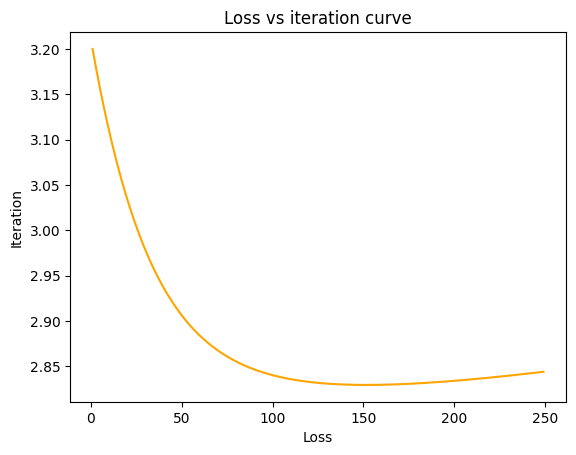

In [104]:
neuron2.plot_loss_curve()

In [105]:
i=0
xs=[]
ys=[]
while(i<1.5):
    xs.append(i)
    i+=0.25

xs=np.array(xs)
ys=(-(neuron2.bias)-neuron2.weights[0]*xs)/neuron2.weights[1]

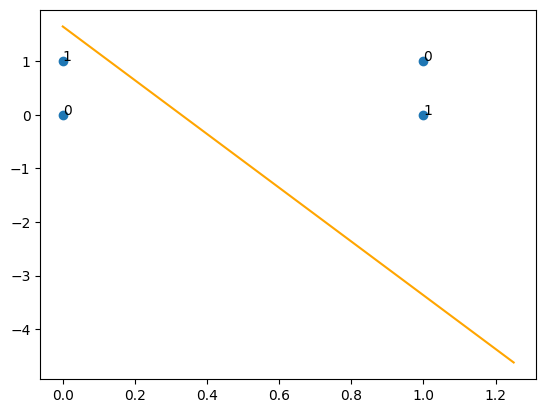

In [106]:
x=[i[0] for i in X2]
y=[i[1] for i in X2]

plt.plot(xs,ys,color="orange")
plt.scatter(x,y)
for index, text in enumerate(Y2):
    plt.annotate(text,(x[index],y[index]))

plt.show()

In [107]:
neuron2.training_accuracy(X2,Y2)

0.5

In [108]:
neuron2.model_coeff__()

[array([0.65647115, 0.13105352]), -0.2154301294479706]